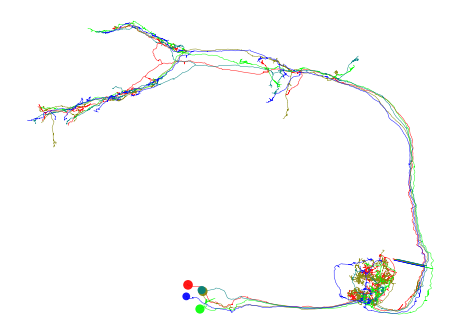

In [6]:
import navis
import matplotlib.pyplot as plt

nl = navis.example_neurons()

# Plot using default settings
fig, ax = nl.plot2d()
plt.show()

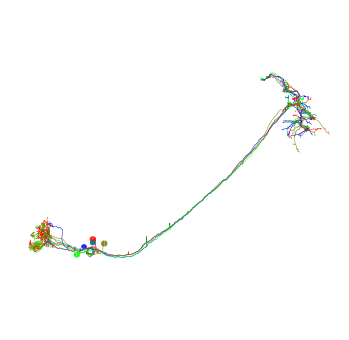

In [ ]:
# Plot using matplotlib's 3D capabilities
fig, ax = nl.plot2d(method='3d_complex')
# Change from default frontal view to lateral view
ax.azim = 0
# Zoom in a bit
ax.dist = 6
plt.show()

In [ ]:
# Render 3D rotation
for i in range(0, 360, 10):
   # Change rotation
   ax.azim = i
   # Save each incremental rotation as frame
   plt.savefig('frame_{0}.png'.format(i), dpi=200)

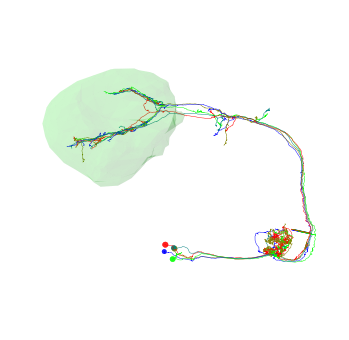

In [ ]:
# Retrieve volume
lh = navis.example_volume('LH')
# Set color and alpha
lh.color = (0, 1, 0, .1)
# Plot
fig, ax = navis.plot2d([nl ,lh], method='3d_complex')
ax.dist = 6
plt.show()

In [ ]:
# Plot using Vispy (will open 3D viewer)
viewer = nl.plot3d(backend='vispy')
# Save screenshot
viewer.screenshot('screenshot.png', alpha=True)

In [ ]:
# Clear existing viewer
navis.close3d()

# Add neurons to viewer
navis.plot3d(nl, backend='vispy')

# Add volume
navis.plot3d(lh, backend='vispy')

# Clear viewer again...
navis.clear3d()

# ... or close altogether
navis.close3d()

In [ ]:
# Open 2 viewers
v1 = navis.Viewer()
v2 = navis.Viewer()

# Add neurons to each one separately
v1.add(nl[0])
v2.add(nl[1])

# Clear first viewer
v1.clear()

# Close the second viewer
v2.close()

In [ ]:
v = navis.get_viewer()

In [ ]:
# Using plotly as backend generates "inline" plots by default (i.e. they are rendered right away)
fig = nl.plot3d(backend='plotly', connectors=False, width=1400)

In [ ]:
# Provide colors
vols = [navis.example_volume('LH'),
        navis.example_volume('neuropil')]
fig = navis.plot3d([nl, *vols], backend='plotly', width=1200)

In [ ]:
cust_vol = pymaid.Volume(vertices=[[1, 2, 1],
                                   [5, 6, 7],
                                   [8, 6, 4]],
                         faces=[(0, 1, 2)],
                         name='custom volume',
                         color=(255, 0, 0))
fig = pymaid.plot3d(cust_vol, backend='plotly', width=1200)

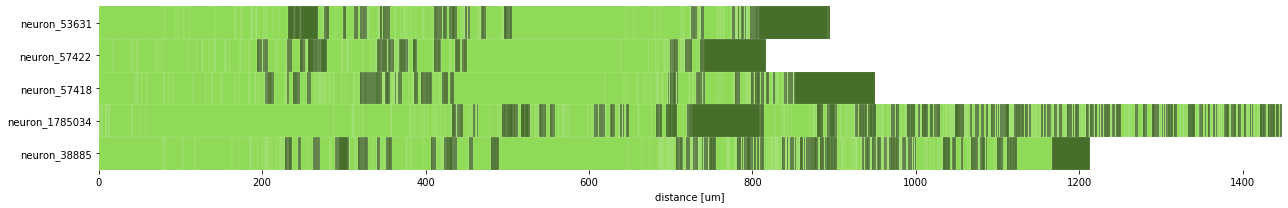

In [5]:
fig, ax = plt.subplots(figsize=(18, 3))

ax = navis.plot1d(nl, ax=ax)

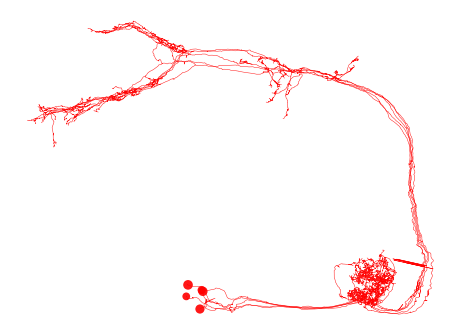

In [17]:
fig, ax = navis.plot2d(nl, color=(1, 0, 0))

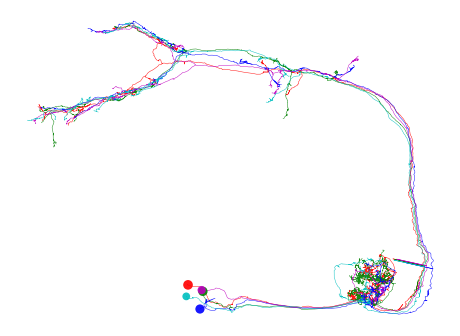

In [16]:
fig, ax = navis.plot2d(nl, color=['r', 'g', 'b', 'm', 'c'])

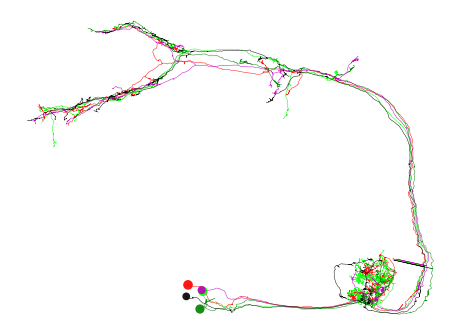

In [3]:
cmap = {nl[0]: 'r',
        nl[1].uuid: (0, 1, 0),
        nl[2].name: 'g',
        nl[3]: 'm',
        nl[4]: 'k'}

fig, ax = navis.plot2d(nl, color=cmap)

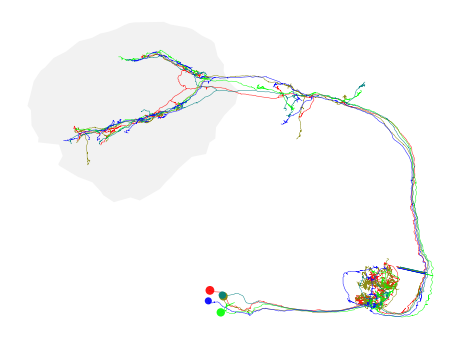

In [11]:
lh = navis.example_volume('LH')
lh.color = (.95, .95, .95, .1)

fig, ax = navis.plot2d([nl, lh])

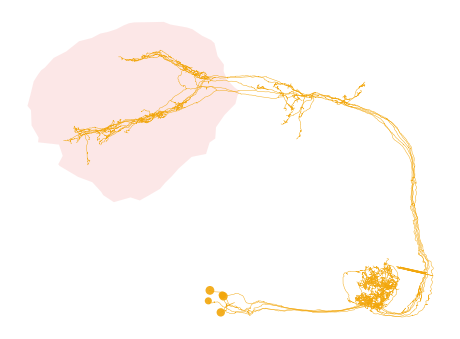

In [3]:
lh = navis.example_volume('LH')

fig, ax = navis.plot2d([nl, lh], colors={lh: (.9, .1, .1, .1)})

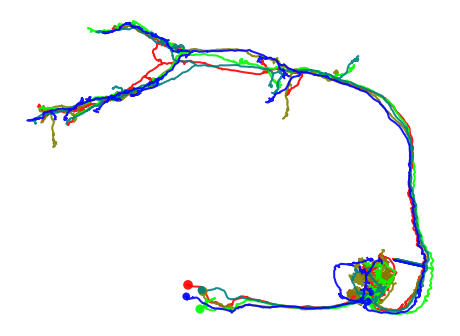

In [12]:
fig, ax = navis.plot2d(nl, linewidth=2)

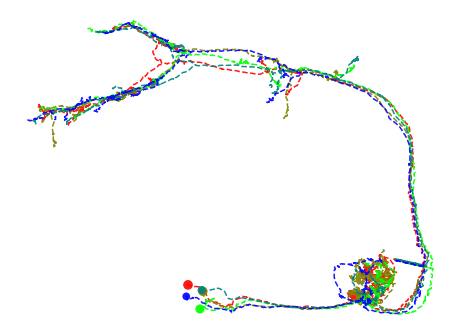

In [13]:
fig, ax = navis.plot2d(nl, linewidth=1.5, linestyle='--')

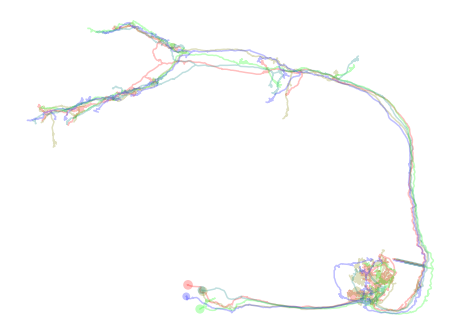

In [14]:
fig, ax = navis.plot2d(nl, linewidth=1.5, alpha=.25)

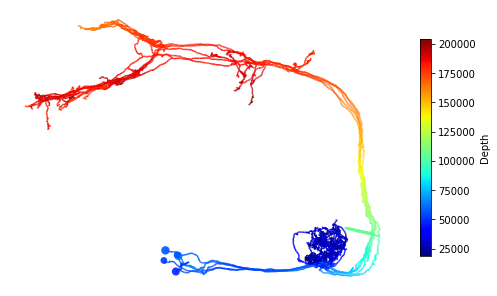

In [7]:
fig, ax = navis.plot2d(nl, method='2d',
                       linewidth=1.5,
                       depth_coloring=True)

plt.show()

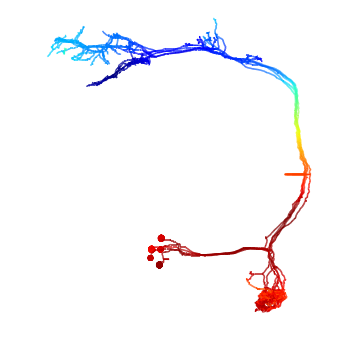

In [8]:
fig, ax = navis.plot2d(nl, method='3d',
                       connectors=False,
                       linewidth=1.5,
                       depth_coloring=True)

# Rotate to top view
ax.elev = 90

# Zoom in a bit
ax.dist = 6

plt.show()